In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.size

3887

In [7]:
df.shape

(299, 13)

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Checking Missing Values

In [8]:
df.isnull().sum()

Missing Values    0
dtype: int64

# DATA Visualization

# Checking Skewness and Data Imbalancing

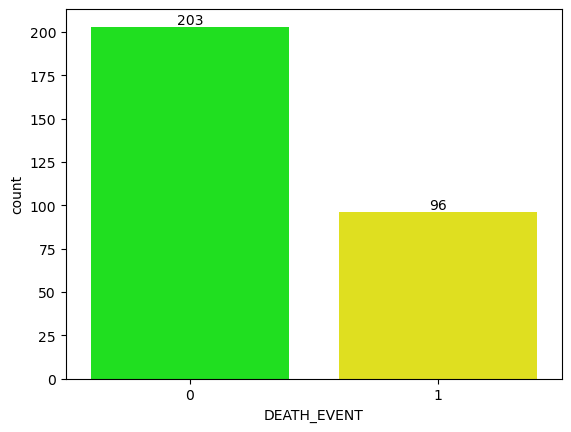

In [24]:
cols = ["#00FF00", "#FFFF00"]

# countplot
ax = sns.countplot(x=df["DEATH_EVENT"], palette=cols)

# Adding label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

There is an imbalance in the data because the target labels are 203 as opposed to 96.

The features "serum creatinine" and "creatinine_phosphokinase" are wildly skewed.

# Correlation Matrix

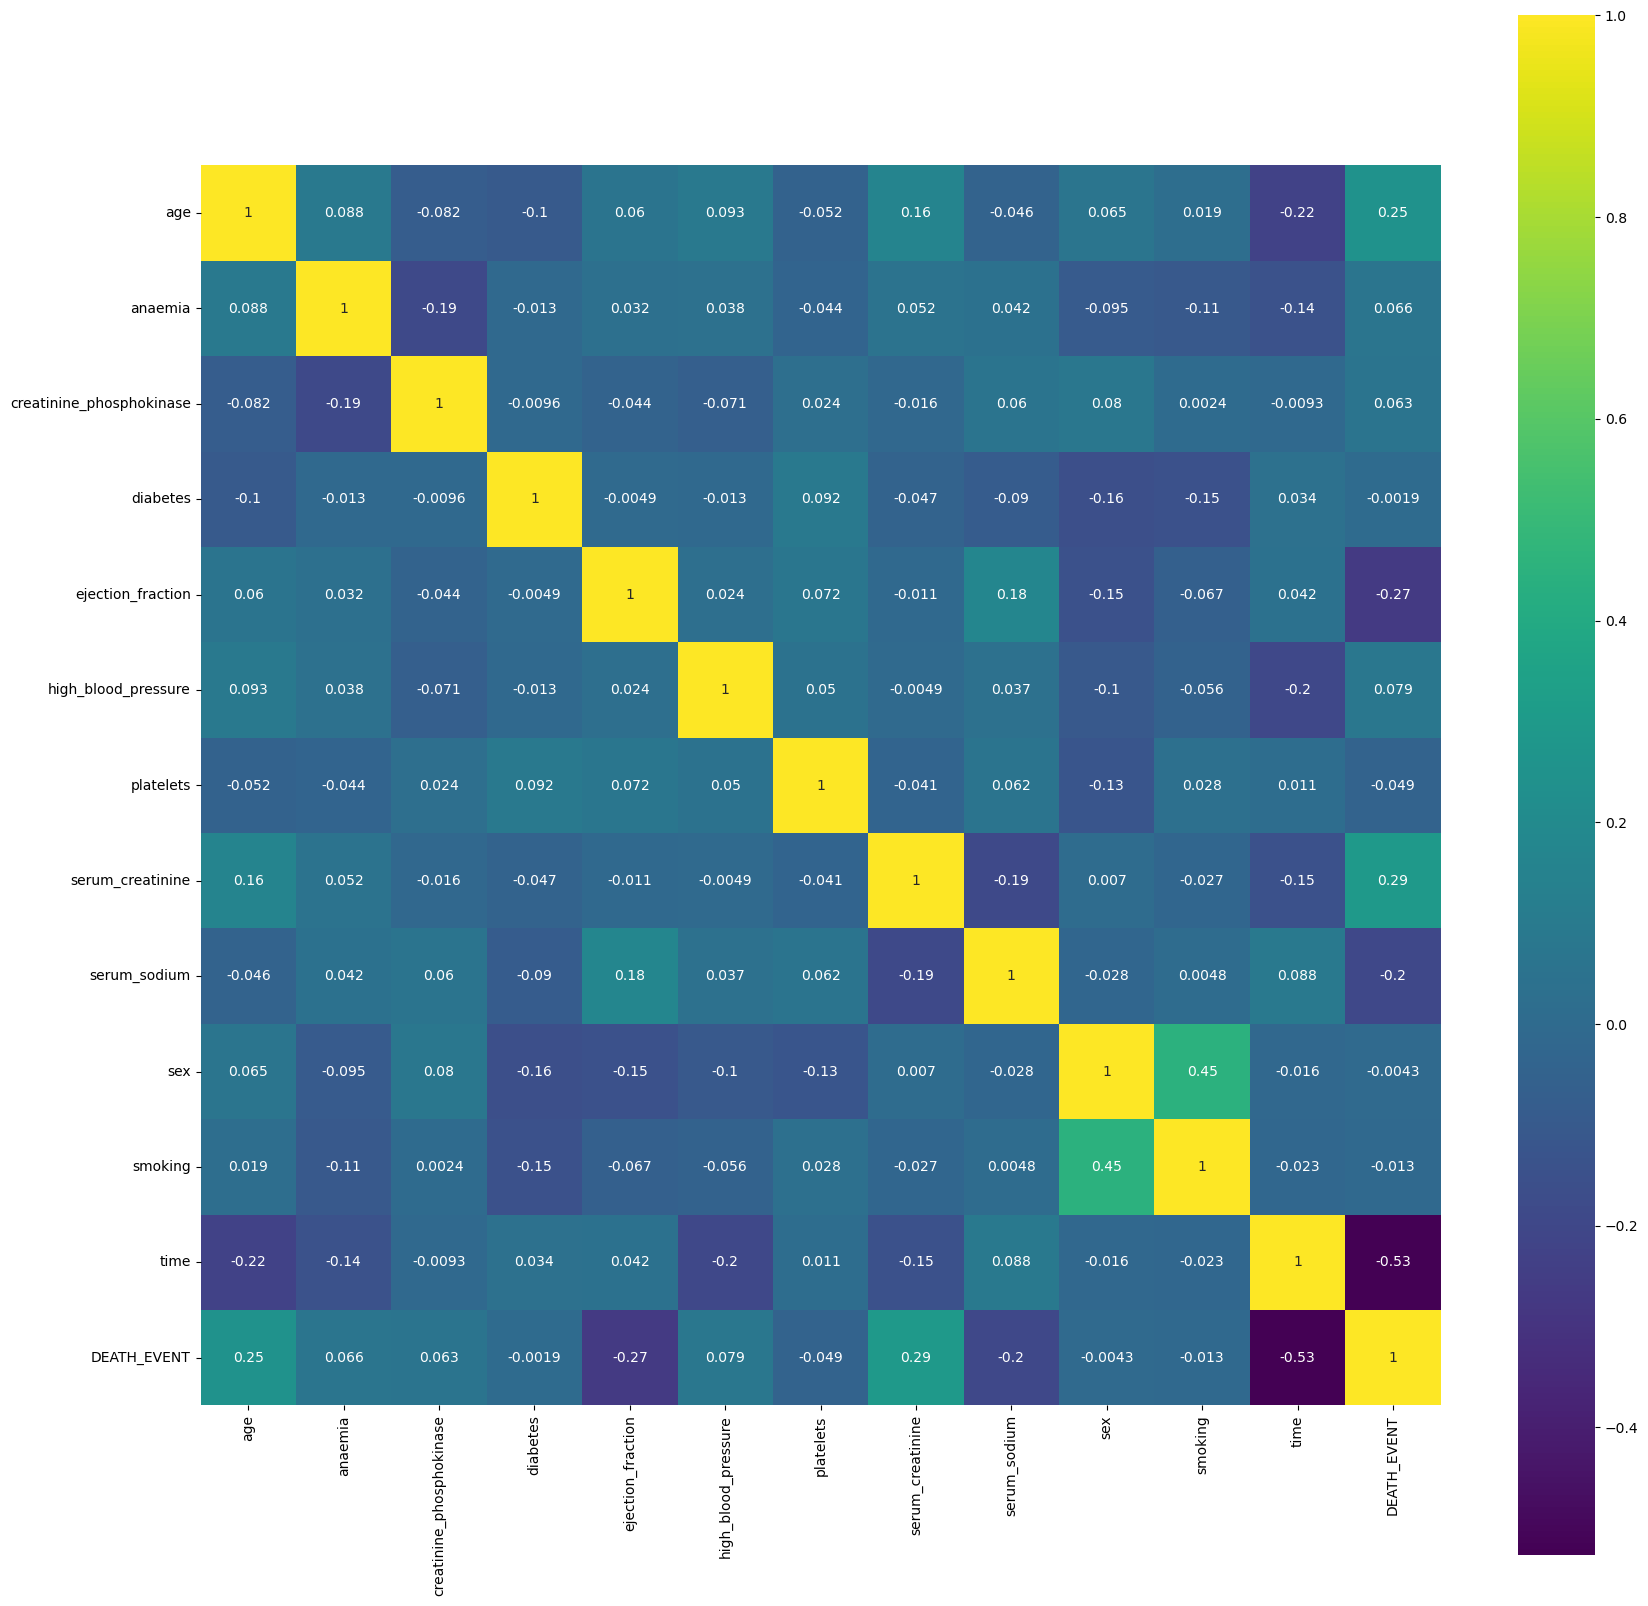

In [26]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)

# correlation matrix
corrmat = df.corr()

# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, cmap='viridis', annot=True, square=True)
plt.show()

"Time" is the most critical component because it would have been imperative to have prompt treatment for a cardiovascular condition after an early diagnosis, hence lowering the risk of death. (As the inverse relationship is clear)

"serum_creatinine" is the next crucial element since the presence of serum, an essential blood component, in blood facilitates cardiac function.


"ejection_fraction" significantly affects the target variable as well, which makes sense given that it essentially represents the heart's efficiency.

The inverse relation pattern indicates that the heart's capacity to function decreases with age.

# Checking Outliers

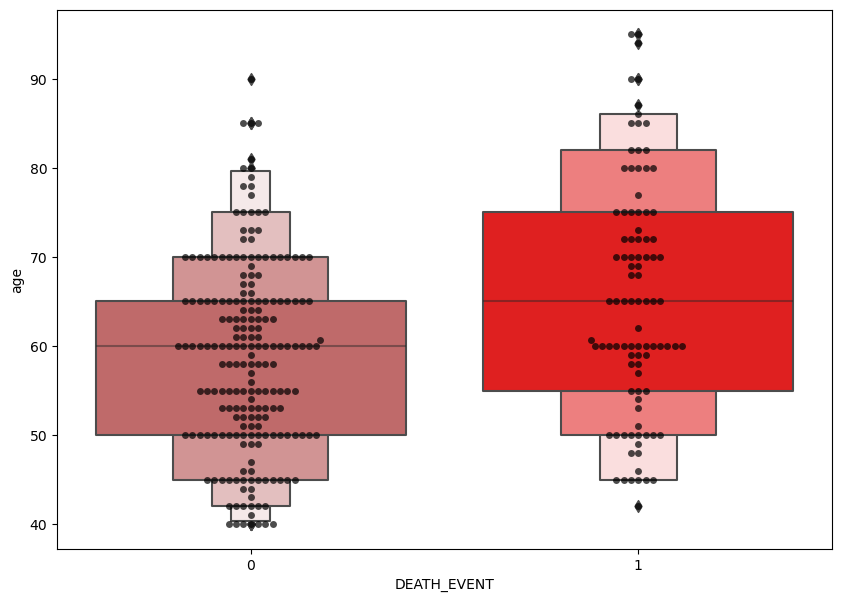

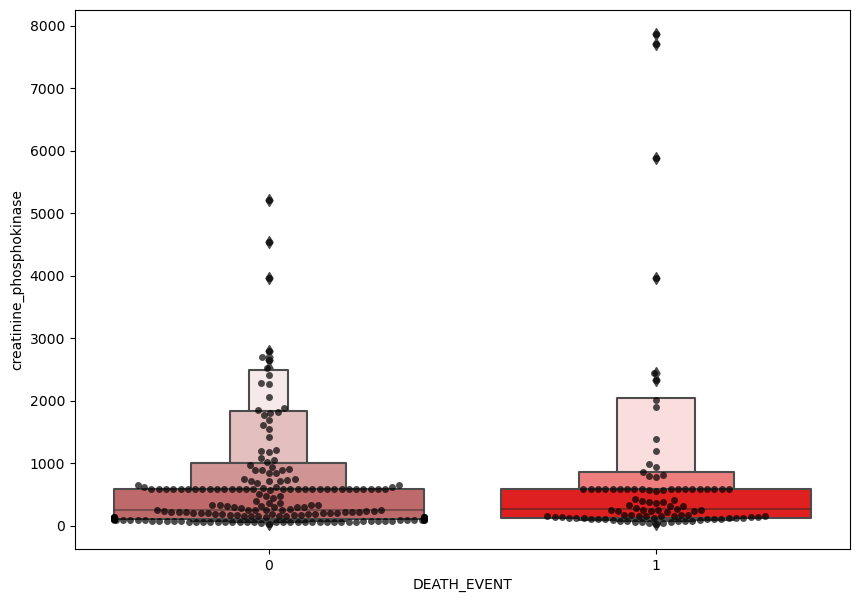

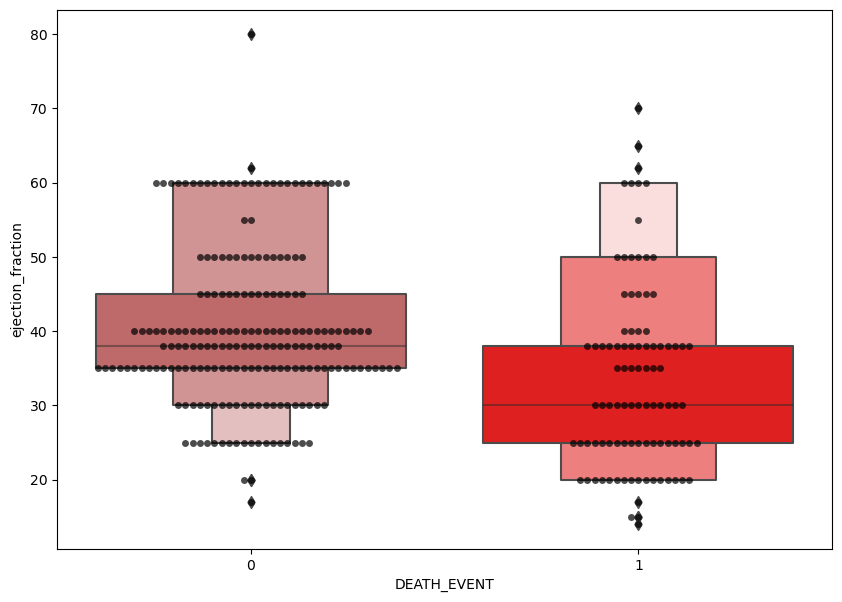

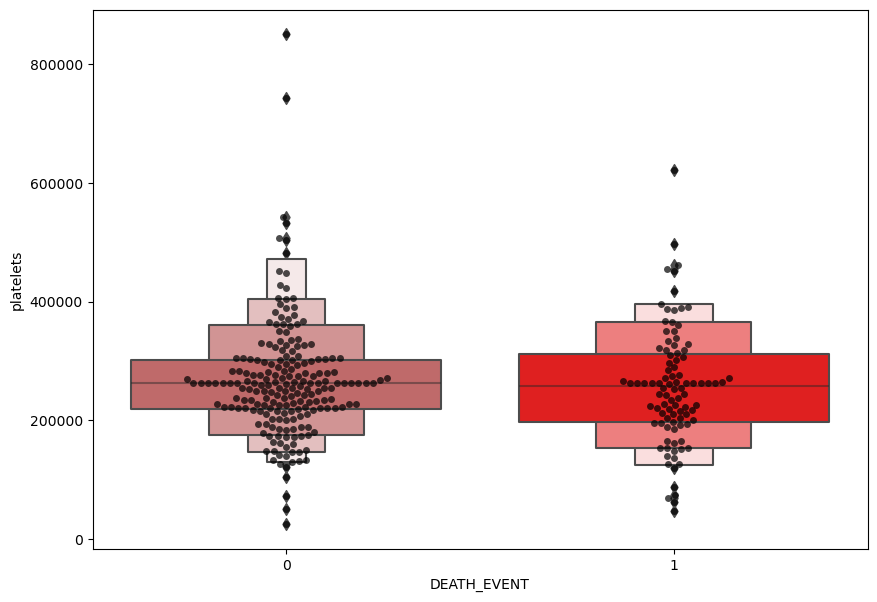

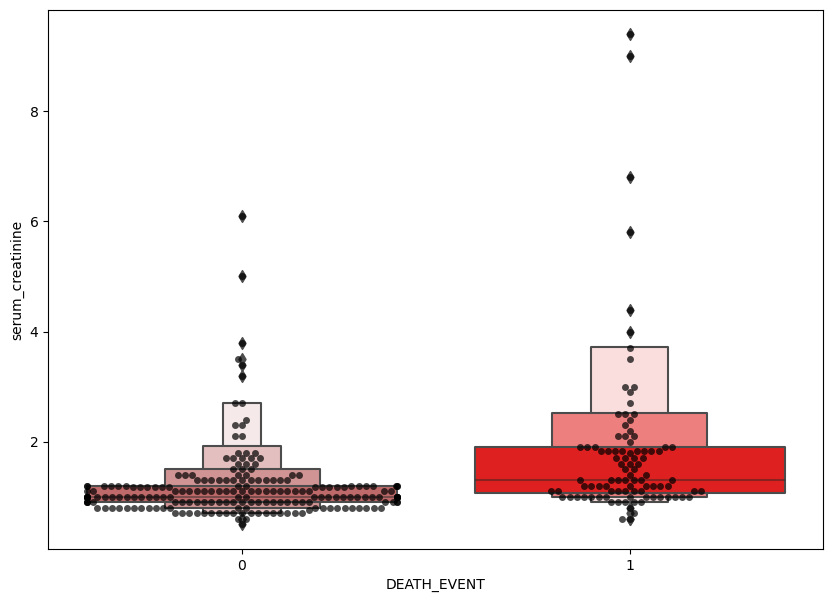

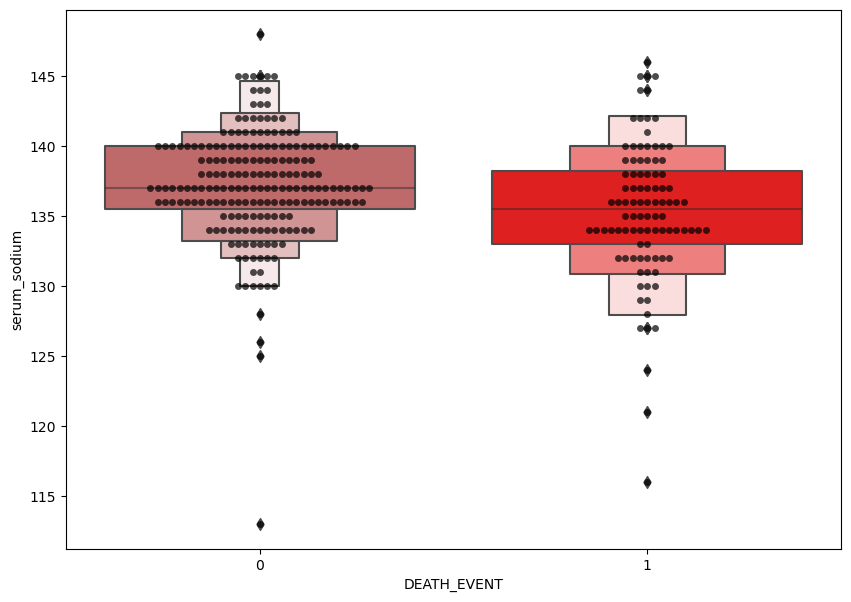

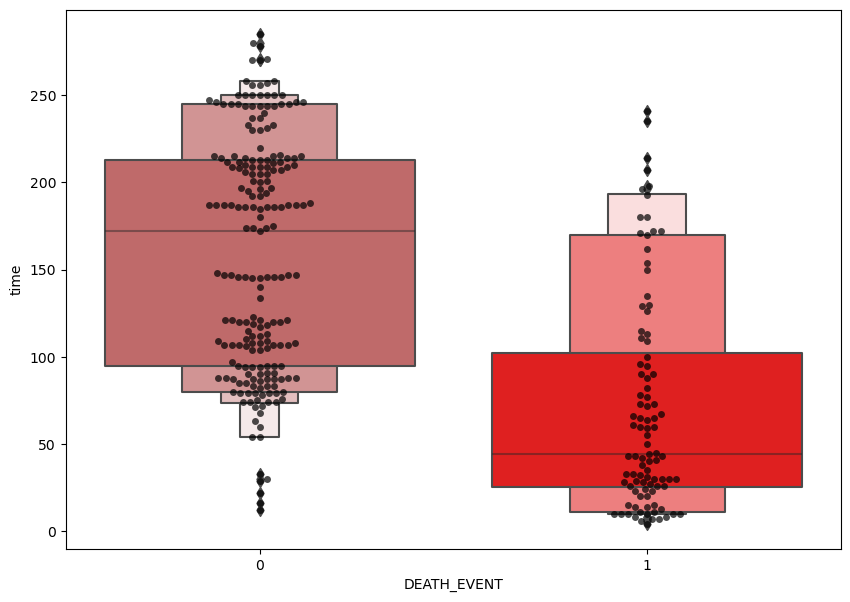

In [7]:
features = ["age", "creatinine_phosphokinase", "ejection_fraction", 
            "platelets", "serum_creatinine", "serum_sodium", "time"]

# Iterate over each feature
for feature in features:
    plt.figure(figsize=(10, 7))
    sns.swarmplot(x=df["DEATH_EVENT"], y=df[feature], color="black", alpha=0.7)
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[feature], palette=cols)
    plt.show()

Nearly every feature shows a few outliers.

We won't remove such outliers during data preprocessing because of the dataset's size and relevance, which would prevent any statistical flukes.

# KDE Plot

<Axes: xlabel='time', ylabel='age'>

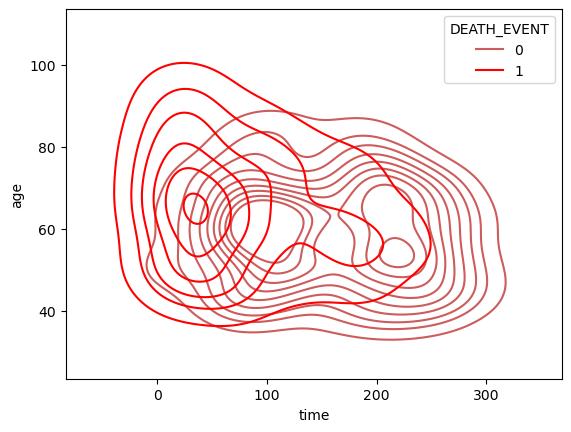

In [9]:
sns.kdeplot(x=df["time"], y=df["age"], hue=df["DEATH_EVENT"], palette=cols)

Patients frequently died only when they grew older when there were fewer follow-up days.

An increased number of follow-up days increases the likelihood of any mortality.

# DATA Preprocessing / Training and Testing of DATA

In [10]:
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [11]:
col_names = list(X.columns)

# Standardize the features
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled = pd.DataFrame(X_scaled, columns=col_names)

# Display descriptive statistics for the scaled features
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [15]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

# Model Building

# Support Vector Machine (SVM)

In [17]:
model1 = svm.SVC()

# Fitting the model 
model1.fit(X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score and rounding it to decimal places
score = round(model1.score(X_test, y_test), 3)
score

0.789

# Classification Report

In [19]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
df_report = pd.DataFrame(report).transpose()

print(df_report)

              precision  recall  f1-score  support
0                  0.84    0.85      0.84    60.00
1                  0.69    0.67      0.68    30.00
accuracy           0.79    0.79      0.79     0.79
macro avg          0.76    0.76      0.76    90.00
weighted avg       0.79    0.79      0.79    90.00


# Confusion Matrix

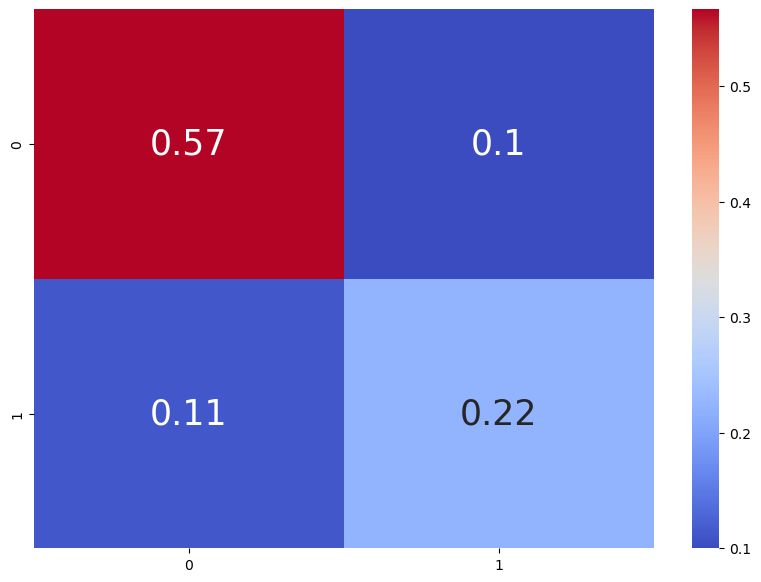

In [21]:
cmap1 = 'coolwarm'  # Change the colormap here

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# heatmap
plt.subplots(figsize=(10, 7))
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=cmap1, annot=True, annot_kws={'size': 25})
plt.show()

# Artificial Neural Network (ANN)

In [30]:
# early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # Minimum amount of change to count as an improvement
    patience=20,      # How many epochs to wait before stopping
    restore_best_weights=True
)

# Initialize the model
model = Sequential([
    Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12),
    Dense(units=8, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(units=8, kernel_initializer='uniform', activation='relu'),
    Dropout(0.5),
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, batch_size=25, epochs=80, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6586 - loss: 0.6930 - val_accuracy: 0.8302 - val_loss: 0.6908
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6114 - loss: 0.6923 - val_accuracy: 0.8302 - val_loss: 0.6889
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6282 - loss: 0.6914 - val_accuracy: 0.8302 - val_loss: 0.6863
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6187 - loss: 0.6907 - val_accuracy: 0.8302 - val_loss: 0.6836
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6196 - loss: 0.6897 - val_accuracy: 0.8302 - val_loss: 0.6805
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6357 - loss: 0.6881 - val_accuracy: 0.8302 - val_loss: 0.6771
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6738 - loss: 0.6854 - val_accuracy: 0.8302 - val_loss: 0.6733
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6262 - loss: 0.6858 - val_accuracy: 0.8302 - val_loss: 0.6699


In [31]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 85.26%


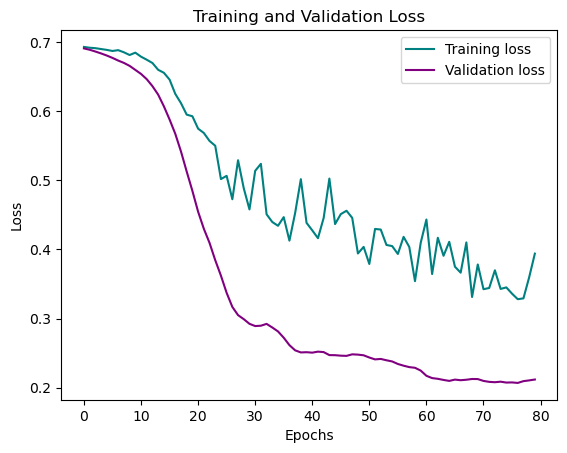

In [35]:
history_df = pd.DataFrame(history.history)

# training and validation loss
plt.plot(history_df['loss'], "#008080", label='Training loss')  # Teal color
plt.plot(history_df['val_loss'], "#800080", label='Validation loss')  # Purple color
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

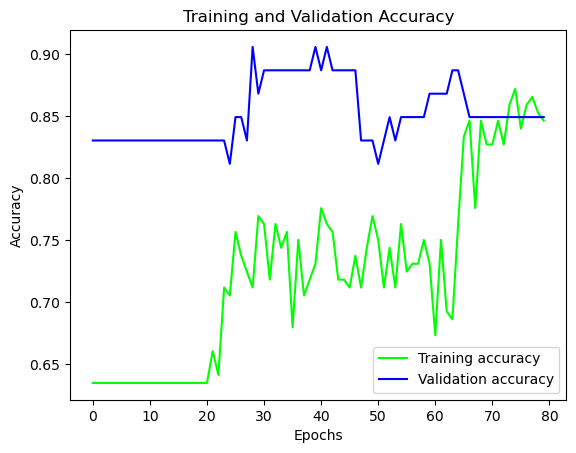

In [34]:
history_df = pd.DataFrame(history.history)

# training and validation accuracy 
plt.plot(history_df['accuracy'], "#00FF00", label='Training accuracy')  # Green color
plt.plot(history_df['val_accuracy'], "#0000FF", label='Validation accuracy')  # Blue color
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


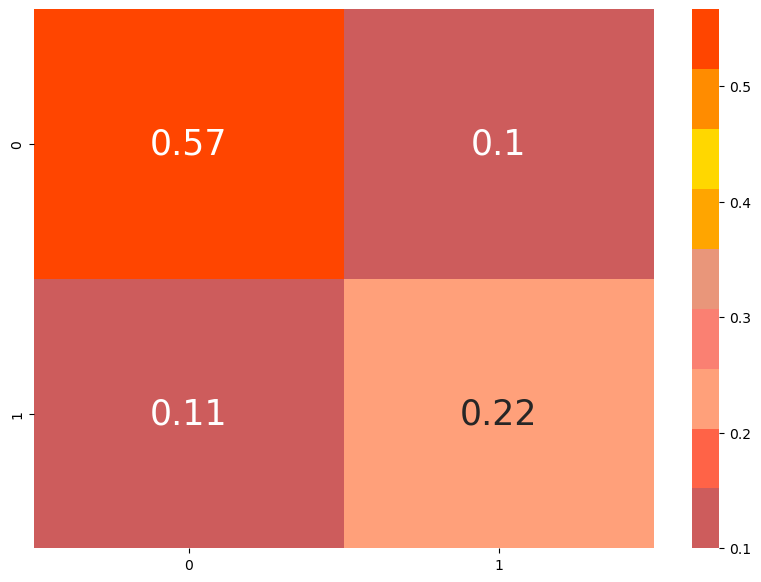

In [38]:
custom_colors = ["#CD5C5C", "#FF6347", "#FFA07A", "#FA8072", "#E9967A", "#FFA500", "#FFD700", "#FF8C00", "#FF4500"]

# confusion matrix
plt.subplots(figsize=(10, 7))
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=custom_colors, annot=True, annot_kws={'size': 25})
plt.show()

In [39]:
# classification report
report = classification_report(y_test, y_pred, output_dict=True)

# classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

print(report_df)

              precision  recall  f1-score  support
0                  0.85    0.75      0.80    60.00
1                  0.59    0.73      0.66    30.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.72    0.74      0.73    90.00
weighted avg       0.76    0.74      0.75    90.00
